In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read file
mosquito = pd.read_csv('05_mosquito_sightings.csv')
mosquito.head()

,vector,occurrence_id,source_type,location_type,polygon_admin,latitude,longitude,year,country,country_id,gaul_ad0,status
0,Aedes albopictus,34479,unpublished,point,-999,22.89,120.44,2006,Taiwan,TWN,886,NaN
1,Aedes albopictus,34478,unpublished,point,-999,22.86,120.40,2006,Taiwan,TWN,886,NaN
2,Aedes albopictus,34481,unpublished,point,-999,22.94,120.24,2006,Taiwan,TWN,886,NaN
3,Aedes albopictus,34480,unpublished,point,-999,23.40,120.36,2006,Taiwan,TWN,886,NaN
4,Aedes albopictus,34494,unpublished,point,-999,22.91,120.48,2006,Taiwan,TWN,886,NaN


In [ ]:
mosquito.shape

(24019, 12)

In [ ]:
mosquito.vector.unique()

array(['Aedes albopictus', 'Aedes aegypti'], dtype=object)

In [ ]:
mosquito.country.unique()

array(['Taiwan', 'India', 'Sri Lanka', 'Costa Rica', 'Viet Nam',
       'Trinidad and Tobago', 'Venezuela', 'Cameroon', 'Colombia',
       'Brazil', 'Indonesia', 'French Guiana', 'Philippines', 'Nigeria',
       'Senegal', 'Thailand', 'Gabon', 'Australia', 'Bolivia', 'Mayotte',
       'Peru', 'Mexico', 'Malaysia', 'Hong Kong', 'Japan', 'China',
       'R?union', 'United States', 'Madagascar', 'Netherlands', 'Albania',
       'Italy', 'Guadeloupe', 'Puerto Rico', 'Myanmar', 'Cuba',
       'Bangladesh', 'Saudi Arabia', 'Argentina', 'Paraguay', 'Israel',
       'West Bank', 'Seychelles', 'Glorioso Island', 'Mauritius',
       'Slovenia', 'Nicaragua', 'Bermuda', 'El Salvador', 'Maldives',
       'Uruguay', 'Kenya', 'Comoros', 'Cayman Islands', 'Georgia',
       'Singapore', "Lao People's Democratic Republic", 'Greece',
       'Pakistan', 'Sudan', 'New Caledonia', 'Martinique', 'Yemen',
       "C?te d'Ivoire", 'Uganda', 'Antigua and Barbuda', 'Serbia',
       'French Polynesia', 'Central Af

In [ ]:
#dropping unnecessary columns
mosquitoes = mosquito[['vector', 'latitude', 'longitude', 'year', 'country']]
mosquitoes.head()

,vector,latitude,longitude,year,country
0,Aedes albopictus,22.89,120.44,2006,Taiwan
1,Aedes albopictus,22.86,120.40,2006,Taiwan
2,Aedes albopictus,22.94,120.24,2006,Taiwan
3,Aedes albopictus,23.40,120.36,2006,Taiwan
4,Aedes albopictus,22.91,120.48,2006,Taiwan


In [ ]:
#argentina
mosquito_arg = mosquitoes[mosquitoes['country'].str.startswith('Argentina')].reset_index(drop='True')
mosquito_arg.head()

,vector,latitude,longitude,year,country
0,Aedes aegypti,-22.02,-63.68,2006,Argentina
1,Aedes aegypti,-34.58,-58.50,2006,Argentina
2,Aedes aegypti,-31.40,-64.18,2006,Argentina
3,Aedes aegypti,-25.61,-54.58,2006,Argentina
4,Aedes aegypti,-23.14,-64.32,2006,Argentina


In [ ]:
#brazil
mosquito_braz = mosquitoes[mosquitoes['country'].str.startswith('Brazil')].reset_index(drop='True')
mosquito_braz.head()

,vector,latitude,longitude,year,country
0,Aedes aegypti,2.83,-60.66,2006,Brazil
1,Aedes aegypti,-15.62,-56.09,2006,Brazil
2,Aedes aegypti,-9.98,-67.81,2006,Brazil
3,Aedes aegypti,-21.21,-47.82,2006,Brazil
4,Aedes aegypti,-21.21,-44.82,2006,Brazil


In [ ]:
mosquito_col = mosquitoes[mosquitoes['country'].str.startswith('Colombia')].reset_index(drop='True')
mosquito_col.head()

,vector,latitude,longitude,year,country
0,Aedes aegypti,0.67,-76.87,2006,Colombia
1,Aedes aegypti,0.68,-76.58,2006,Colombia
2,Aedes aegypti,3.45,-76.52,2006,Colombia
3,Aedes aegypti,5.69,-76.65,2006,Colombia
4,Aedes aegypti,6.34,-75.56,2006,Colombia


In [ ]:
mosquito_mex = mosquitoes[mosquitoes['country'].str.startswith('Mexico')].reset_index(drop='True')
mosquito_us = mosquitoes[mosquitoes['country'].str.startswith('United States')].reset_index(drop='True')
mosquito_puerto = mosquitoes[mosquitoes['country'].str.startswith('Puerto Rico')].reset_index(drop='True')
mosquito_nic = mosquitoes[mosquitoes['country'].str.startswith('Nicaragua')].reset_index(drop='True')
mosquito_elsal = mosquitoes[mosquitoes['country'].str.startswith('El Salvador')].reset_index(drop='True')
mosquito_haiti = mosquitoes[mosquitoes['country'].str.startswith('Haiti')].reset_index(drop='True')



In [ ]:
mosquito_total = pd.concat([mosquito_arg, mosquito_braz, mosquito_col, mosquito_elsal, mosquito_haiti, mosquito_mex, mosquito_nic, mosquito_puerto, mosquito_us], ignore_index=True)
mosquito_total

,vector,latitude,longitude,year,country
0,Aedes aegypti,-22.020000,-63.680000,2006,Argentina
1,Aedes aegypti,-34.580000,-58.500000,2006,Argentina
2,Aedes aegypti,-31.400000,-64.180000,2006,Argentina
3,Aedes aegypti,-25.610000,-54.580000,2006,Argentina
4,Aedes aegypti,-23.140000,-64.320000,2006,Argentina
...,...,...,...,...,...
8205,Aedes aegypti,36.750004,-119.583333,2014,United States
8206,Aedes aegypti,37.083330,-120.083333,2014,United States
8207,Aedes aegypti,36.916670,-120.083333,2014,United States
8208,Aedes aegypti,37.416667,-122.250000,2014,United States


In [ ]:

mosquito_sightings = pd.DataFrame({'total' : mosquito_total.groupby(['vector', 'country']).size()}).reset_index()
mosquito_sightings

,vector,country,total
0,Aedes aegypti,Argentina,49
1,Aedes aegypti,Brazil,4550
2,Aedes aegypti,Colombia,70
3,Aedes aegypti,El Salvador,1
4,Aedes aegypti,Mexico,157
5,Aedes aegypti,Nicaragua,5
6,Aedes aegypti,Puerto Rico,16
7,Aedes aegypti,United States,22
8,Aedes albopictus,Brazil,3285
9,Aedes albopictus,Colombia,1


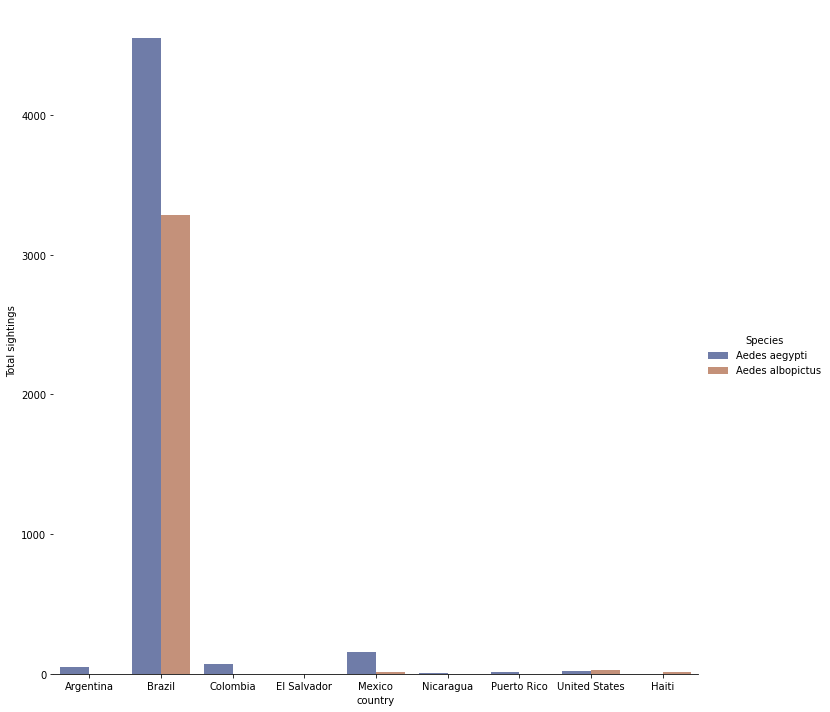

In [ ]:

m = sns.catplot(
    data=mosquito_sightings, kind="bar",
    x="country", y="total", hue="vector",
    ci="sd", palette="dark", alpha=0.6, height=10)


m.despine(left=True)
m.set_axis_labels("country", "Total sightings")
m.legend.set_title("Species")


In [ ]:
mosquito_sightings.to_csv('mosquito_sightings.csv', index=False)

#Conclusion

